# Data visualization

This notebook aims at visualizing the main results of the study of the Raman spectra computed from BigDFT. The converged results will also be compared to that of the literature.

In [1]:
import matplotlib.pyplot as plt
import sqlite3

# Connect to the database and define a cursor
conn = sqlite3.connect('../results.db')
c = conn.cursor()

In [2]:
# Set parameters for matplotlib
plt.rcParams.update({'font.size': 14})
colors = ['#d73027', '#f46d43', '#aaaaaa', '#66bd63', '#1a9850']

In [3]:
# Get all the relevant data
MOLECULES = [name for (name,) in c.execute("""SELECT name FROM molecule""").fetchall()]
HGRIDS = [value for (value,) in c.execute("""SELECT value FROM hgrid""").fetchall()][::-1]
RMULTS = c.execute("""SELECT frmult, crmult FROM rmult""").fetchall()
nb_notebooks = c.execute("SELECT COUNT(*) FROM notebook").fetchall()[0][0]
xmax = nb_notebooks // len(MOLECULES)

In [4]:
# Be sure to run the convergence_studies/post_processing.ipynb
# notebook to make sure the converged_param table is in the database.
data = c.execute("""SELECT * FROM converged_param""").fetchall()
CONVERGED_PARAMS = {
    name: {"hgrids": hg, "rmult": [frm, crm]}
    for (name, hg, frm, crm) in data
}

## Spectra studies

Here we will try to plot the Raman and infrared spectra of the studied molecules. To this end, we will gather the energy and the related intensity of for each molecule.

### Infrared spectrum

In [5]:
import numpy as np

def gaussian(ω, intensity, grid, σ=15):
    return intensity * np.exp(- (grid-ω)**2 / (2*σ**2))

CH4
exp: [(1357.0, 0.84), (1357.0, 0.98), (3158.0, 1.51), (3158.0, 1.7), (3019.0, 1.55), (1311.0, 0.753), (3109.0, 1.509), (3109.0, 1.703), (1534.0, 0.1), (1534.0, 0.016), (1306.0, 0.839), (1306.0, 0.979)]
th: [(1283.0, 0.928), (3090.0, 1.322), (1244.0, 1.374), (3082.0, 0.654)]
[(3096.10745, 0.220692997), (3096.19186, 0.220692879), (3096.19952, 0.220505799), (1286.80506, 0.465478374), (1286.74019, 0.465585633), (1286.70483, 0.465499675)]
[(3078.88079, 0.215713838), (3078.83673, 0.215595841), (3078.83475, 0.215638133), (1258.16838, 0.469728601), (1258.29662, 0.469617606), (1258.28629, 0.469567146)]
[(3080.09226, 0.216379404), (3080.14743, 0.216387999), (3080.12155, 0.216320787), (1256.0291, 0.468160334), (1255.85313, 0.468910724), (1255.82619, 0.468852109)]
[(3079.79499, 0.216395133), (3079.67221, 0.217023051), (3079.69604, 0.216948703), (1251.58257, 0.469345712), (1252.57007, 0.468489212), (1252.51141, 0.468427164)]
[(3079.28095, 0.217818115), (3079.2413, 0.218170214), (3079.22643, 0.2

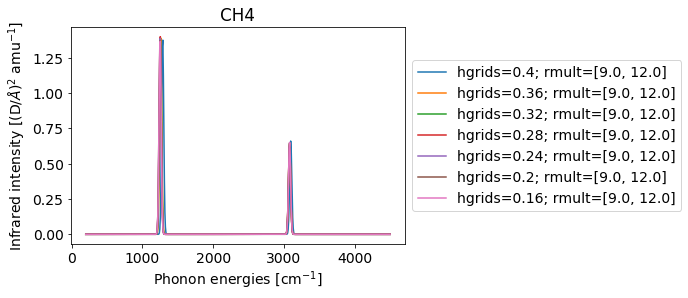

CO
exp: [(2143.0, 1.45), (2143.0, 1.21), (2143.0, 1.54)]
th: []
[(2190.25182, 1.5710897)]
[(2154.84754, 1.54115876)]
[(2153.57446, 1.55265079)]
[(2164.40128, 1.55088927)]
[(2157.98031, 1.54764125)]
[(2160.42876, 1.54829013)]
[(2159.77394, 1.5479653)]


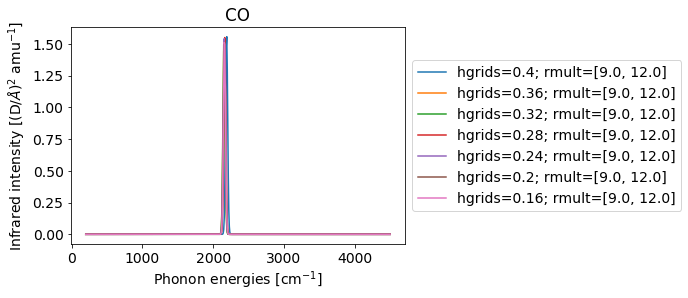

H2O
exp: [(1648.0, 1.16), (1648.0, 1.59), (3832.0, 0.059), (3943.0, 1.0), (3943.0, 1.42), (3657.0, 0.069), (1595.0, 1.48), (3756.0, 0.987), (3756.0, 1.002), (3756.0, 1.416), (3657.0, 0.059), (1595.0, 1.165), (1595.0, 1.59)]
th: [(1575.0, 1.659), (3694.0, 0.037), (3808.0, 1.212), (1534.0, 1.841), (3698.0, 0.094), (3812.0, 1.742)]
[(3750.84041, 0.142241933), (3706.94032, 1.62965639), (1710.40051, 1.79370852)]
[(3705.52053, 0.0978719712), (3833.67382, 1.72272466), (1541.37664, 1.7956236)]
[(3733.56424, 0.124766472), (3872.15161, 1.74692062), (1686.42207, 1.75781247)]
[(3721.40088, 0.118847242), (3846.90081, 1.73606092), (1633.62935, 1.77036311)]
[(3819.29737, 1.71879271), (3699.16596, 0.099617811), (1527.72857, 1.78959346)]
[(3702.892, 0.101527407), (3816.50605, 1.71637079), (1546.29687, 1.79014341)]
[(3703.43582, 0.101147128), (3814.89352, 1.71512834), (1554.2555, 1.77898019)]


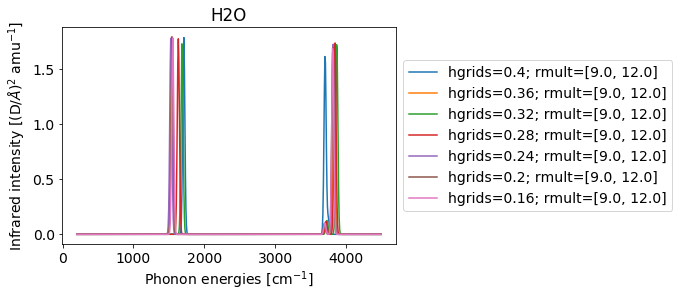

H3CCN
exp: [(3009.2, 0.0712), (2954.1, 0.0648), (2266.7, 0.0596), (1448.01, 0.5448), (1381.8, 0.0499), (1041.846, 0.0741), (920.29, 0.0293), (362.0, 0.0398)]
th: []
[(3058.74071, 0.01031757), (3039.32503, 0.01165502), (2954.93419, 0.02054921), (2310.68748, 0.35762576), (1431.12044, 0.32824229), (1407.79808, 0.31718902), (1340.46813, 0.18556334), (981.44097, 0.00125892), (1022.38431, 0.10441948), (1024.77635, 0.11580106), (409.848757, 0.01560918), (409.798981, 0.01225136)]
[(3044.07152, 0.01072752), (3036.54907, 0.01081887), (2956.50941, 0.00769603), (2307.34955, 0.36175283), (1392.04606, 0.33408487), (1388.0979, 0.3246478), (1326.44425, 0.21285241), (998.730434, 0.10128255), (999.335031, 0.10849127), (960.567301, 0.00688119), (387.110735, 0.01073913), (372.45195, 0.0014877)]
[(3042.7571, 0.01115714), (3039.45533, 0.0110921), (2957.83527, 0.00767421), (2305.94597, 0.36195416), (1388.92027, 0.33036864), (1387.73352, 0.32490372), (1331.13171, 0.21191425), (1000.15736, 0.10439077), (999.38

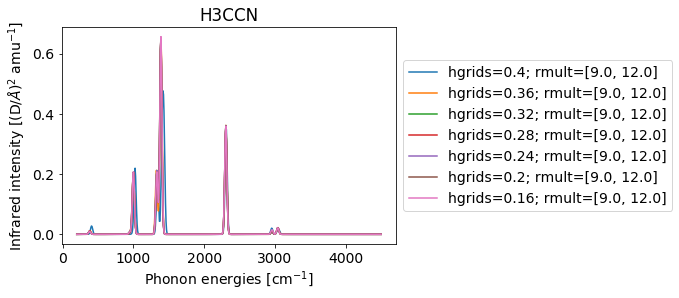

H3CNC
exp: [(920.29, 0.3761), (362.0, 2.693), (2965.8, 0.4546), (3014.3, 0.4546), (2166.0, 0.35)]
th: [(3045.0, 0.4016), (2231.0, 3.285), (1457.0, 0.11), (953.0, 0.3086), (3115.0, 0.229), (1494.0, 0.5273), (1148.0, 0.0033), (266.0, 0.018)]
[(2932.82875, 0.232890637), (3024.6929, 0.0136220119), (3030.06315, 0.0128437072), (2199.81567, 2.33155331), (1400.78775, 0.347865284), (1358.26415, 0.0121230988), (1374.20365, 0.335563969), (994.097992, 0.0967839634), (1073.20359, 0.0107992253), (1080.06767, 0.0112402814), (327.652026, 0.00331101838), (268.703246, 0.00143272958)]
[(2948.95501, 0.243457534), (3028.78639, 0.013895668), (3031.76749, 0.0135464992), (2193.83099, 2.33238413), (1369.49403, 0.00261900539), (1403.76974, 0.346963236), (1407.90628, 0.348377658), (982.186406, 0.102134913), (1079.42609, 0.0102359366), (1080.6894, 0.0101992697), (281.367871, 0.00164576783), (262.967784, 0.000935517036)]
[(2192.34408, 2.3074583), (2950.61109, 0.234124086), (3030.91978, 0.0134485159), (3031.795, 0.

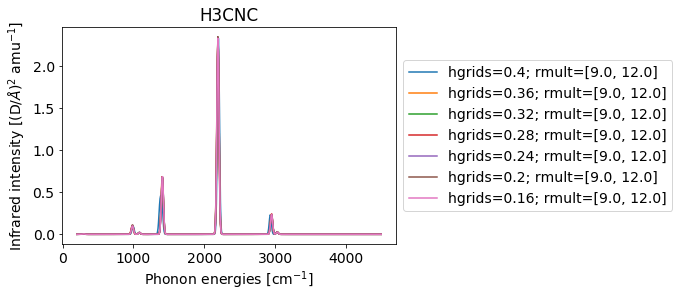

HCCH
exp: [(747.0, 3.84), (747.0, 4.26), (3415.0, 1.48), (730.0, 1.666), (3282.0, 4.1912), (3374.0, 0.0), (1974.0, 0.0), (3289.0, 1.48), (612.0, 0.0), (730.0, 3.839), (730.0, 4.265)]
th: [(603.0, 0.0), (734.0, 4.465), (2010.0, 0.0), (3366.0, 2.052), (3464.0, 0.0), (626.0, 0.0), (720.0, 4.652), (2024.0, 0.0), (3323.0, 2.538), (3420.0, 0.0)]
[(3298.02795, 2.6217922), (766.359244, 2.34478675), (766.34166, 2.34480126)]
[(3308.24592, 2.65244212), (725.454971, 2.34585359), (725.427881, 2.34582162)]
[(3320.71739, 2.59746643), (719.116811, 2.33883154), (719.056361, 2.33892152)]
[(3316.45988, 2.5988929), (717.193091, 2.34319227), (717.101058, 2.34265193)]
[(3309.70996, 2.60754798), (716.718403, 2.34082248), (716.523303, 2.34067276)]
[(3311.91705, 2.6277012), (715.859127, 2.35682516), (715.759004, 2.35636506)]
[(3313.73397, 2.6051954), (718.013082, 2.33910911), (717.775744, 2.33931531)]


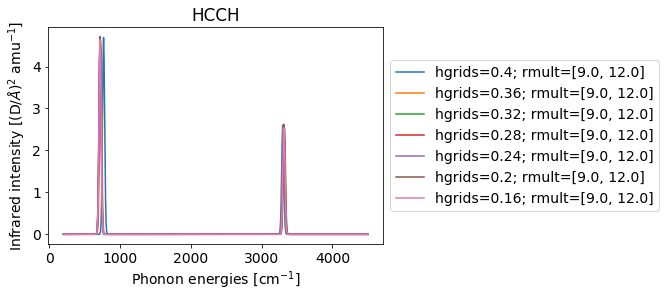

HCN
exp: [(2097.0, 0.0038), (712.0, 1.188), (3311.0, 1.403)]
th: []
[(3317.34563, 1.85708723), (2123.492, 0.0251311909), (734.804471, 0.870848038), (734.789813, 0.870843685)]
[(3363.44262, 1.86845547), (2163.9996, 0.0137625166), (732.458355, 0.804605611), (732.452994, 0.804605233)]
[(3331.66136, 1.78136464), (2136.73345, 0.0154650874), (718.153733, 0.848184329), (718.153418, 0.848298808)]
[(3341.52756, 1.7740169), (2148.73549, 0.0139352926), (717.172585, 0.839000831), (717.171746, 0.838785383)]
[(3341.2545, 1.77265838), (2144.55961, 0.0152893971), (710.788854, 0.843428451), (710.787495, 0.843342602)]
[(3335.92413, 1.77148555), (2139.41098, 0.0164583783), (713.728134, 0.864856217), (713.729014, 0.864904324)]
[(3335.07771, 1.77132746), (2139.13423, 0.0166177651), (713.432503, 0.870932195), (713.431667, 0.870959752)]


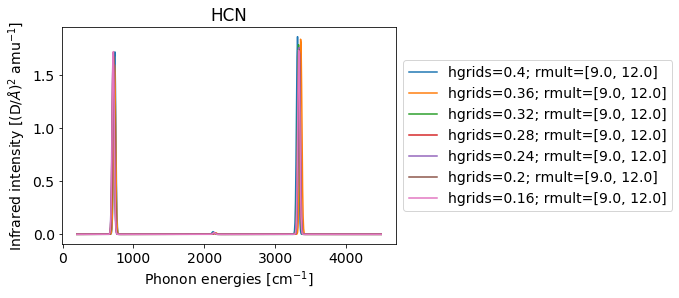

No handles with labels found to put in legend.


N2
exp: []
th: []


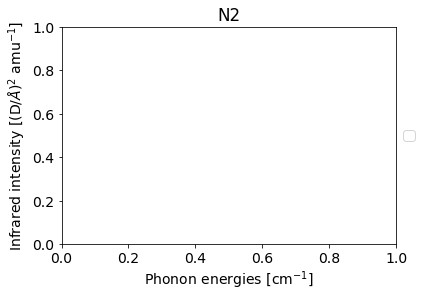

NF3
exp: [(1032.0, 0.7), (647.0, 0.037), (907.0, 9.44), (492.0, 0.0322)]
th: []
[(2124.26425, 1.17239769), (1884.23658, 5.68753205), (2009.12855, 4.33464391), (1568.18419, 0.623678728), (1497.66092, 1.44065936), (869.371366, 0.742680744)]
[(1391.50962, 0.87485787), (1123.08003, 5.47588823), (1241.87374, 3.77172115), (897.49801, 0.0164526205), (564.818018, 0.431383306), (625.961785, 1.86218032)]
[(1039.65516, 0.778595029), (881.980066, 5.93360607), (872.127597, 5.93929688), (669.297221, 0.0414965403), (466.738036, 0.0122932297), (514.387443, 0.067838713)]
[(1035.52943, 0.789432825), (859.336398, 5.72407156), (843.35465, 5.85315748), (505.723531, 0.243430357), (630.110467, 0.0229833184), (470.382784, 0.12148931)]
[(1021.11897, 0.778735779), (863.95491, 5.83932363), (848.471682, 5.89279043), (640.690455, 0.0308182044), (495.223604, 0.132719317), (478.429002, 0.0686520339)]
[(1028.47231, 0.775228884), (866.40777, 5.87846715), (856.378084, 5.92683918), (641.982746, 0.0342813891), (483.47586

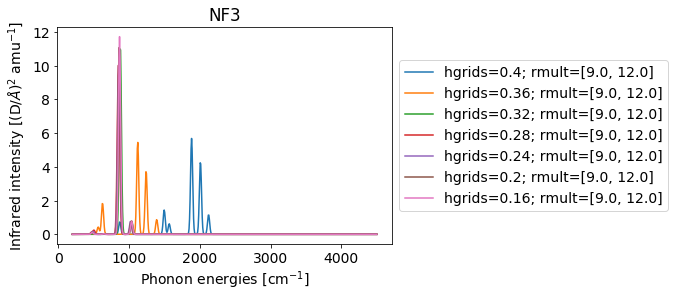

NH3
exp: [(3506.0, 0.116), (1022.0, 3.5), (3577.0, 0.076), (1691.0, 0.64), (3337.0, 0.117), (950.0, 3.437), (950.0, 4.189), (3444.0, 0.076), (1627.0, 0.369), (1627.0, 0.798)]
th: []
[(3526.59686, 0.245879249), (3521.74071, 0.248793784), (3381.07344, 0.0898447996), (1589.95088, 0.438077026), (1573.24469, 0.432889682), (802.773255, 3.54793329)]
[(3527.90151, 0.24775062), (3510.84698, 0.239463376), (3386.07897, 0.0794332992), (1578.79091, 0.438555125), (1560.96773, 0.427398705), (1007.02485, 3.52731192)]
[(3528.21901, 0.254125955), (3524.75703, 0.252320218), (3386.64286, 0.0904354606), (1576.40209, 0.440467275), (1573.95906, 0.439284158), (852.692291, 3.53756601)]
[(3528.20437, 0.251026548), (3523.53322, 0.249843853), (3389.90678, 0.0800331251), (1576.7668, 0.441153369), (1574.80684, 0.437368583), (983.363637, 3.53373808)]
[(3388.23571, 0.0839335144), (3525.20785, 0.248095423), (3522.1774, 0.246768158), (1575.99911, 0.438251909), (1573.6774, 0.436859511), (945.28206, 3.54243244)]
[(3523.8

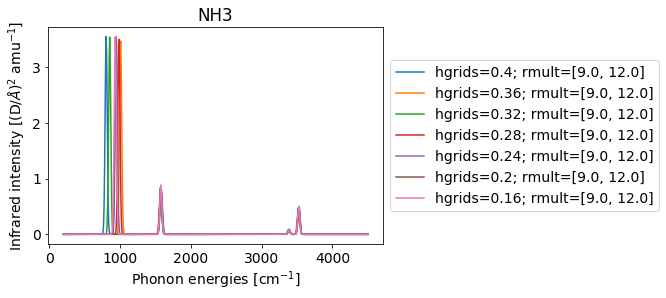

SiF4
exp: [(1032.0, 13.98), (389.0, 2.691)]
th: []
[(1808.93776, 0.0136648097), (1822.86157, 3.0144838), (1824.58204, 3.00923976), (1824.57358, 3.00907169), (1669.38445, 0.000603995878), (1669.36939, 0.000636653865), (1588.61846, 3.76299349), (1589.33584, 3.78065275), (1589.33953, 3.78084166)]
[(1237.78431, 4.75560946), (1238.22096, 4.74598415), (1238.21344, 4.74610885), (894.440497, 1.40947962), (895.919493, 1.40872945), (895.938745, 1.40834688), (884.594638, 0.0105377735), (884.593427, 0.0108682857)]
[(1040.12992, 4.98615064), (1040.42485, 4.9866298), (1040.41111, 4.9869509), (469.030659, 0.972865804), (468.517522, 0.972600877), (468.568272, 0.97146925)]
[(1059.33881, 4.97605451), (1059.57702, 4.97504254), (1059.5668, 4.97497875), (544.294787, 0.944019723), (544.611595, 0.946240532), (544.645238, 0.946272417)]
[(1035.82689, 4.99278911), (1036.02607, 4.98995938), (1036.00913, 4.990059), (478.036626, 0.932528563), (477.718106, 0.934204145), (477.67341, 0.934312578)]
[(1006.08046, 5.026

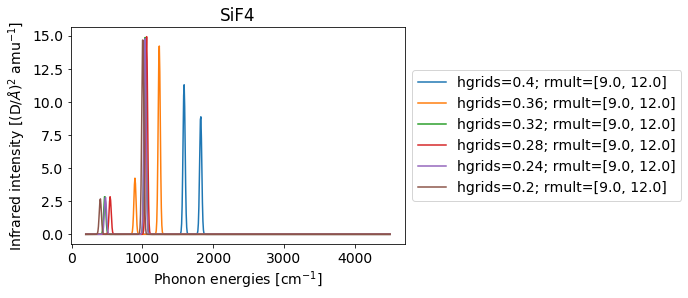

In [6]:
from sqlite3 import OperationalError

grid = np.linspace(200, 4500, 601)

for name in MOLECULES:
    print(name)
    # Gather experimental and theoretical values
    exp = c.execute("SELECT e.value, ir.value, ir.notes "
                    "FROM exp_infrared_intensity ir "
                    "JOIN exp_phonon_energy e "
                    "ON ir.id_mode = e.id_mode "
                    "WHERE ir.molecule = ?", [name]).fetchall()
    exp_values  = [data[:-1] for data in exp]
    print("exp:", exp_values)
    th = c.execute("SELECT e.value, ir.value, ir.notes "
                   "FROM th_infrared_intensity ir "
                   "JOIN th_phonon_energy e "
                   "ON ir.id_mode = e.id_mode "
                   "WHERE ir.molecule = ?", [name]).fetchall()
    th_values  = [data[:-1] for data in th]
    print("th:", th_values)
    # Gather all the phonons energies and their related infrared intensity
    # in a temporary table
    try:
        c.execute("CREATE TEMP TABLE infrared_spectrum AS "
                  "SELECT n.id, n.molecule, n.hgrid, n.frmult, n.crmult, e.value AS energy, ir.value AS intensity "
                  "FROM infrared_intensity ir "
                  "JOIN phonon_energy e "
                  "ON ir.id_notebook = e.id_notebook AND ir.id_mode = e.id_mode "
                  "JOIN notebook n "
                  "ON e.id_notebook = n.id "
                  "WHERE e.value > 200 AND ir.value > 0.0001")
        results = c.fetchall()
    except OperationalError:
        pass
    ids_nb = [
        val
        for (val,) in c.execute(
            "SELECT id FROM infrared_spectrum "
            "WHERE molecule = ? AND frmult = 9 AND crmult = 12 "
            "GROUP BY id", [name]
        ).fetchall()
    ]
    
    for id_nb in ids_nb:
        modes = c.execute("SELECT energy, intensity FROM infrared_spectrum "
                          "WHERE id = ?", [id_nb]).fetchall()
        hg, frm, crm = c.execute("SELECT hgrid, frmult, crmult "
                                 "FROM infrared_spectrum "
                                 "WHERE id = ? "
                                 "GROUP BY hgrid", [id_nb]).fetchall()[0]
        if modes:
            print(modes)
            spectrum = np.zeros_like(grid)
            for ω, intensity in modes:
                spectrum += gaussian(ω, intensity, grid)
            plt.plot(grid, spectrum, label=f"hgrids={hg}; rmult=[{frm}, {crm}]")
    plt.title(name)
    plt.legend(loc=6, bbox_to_anchor=(1, 0.5))
    plt.xlabel(r"Phonon energies [cm$^{-1}$]")
    plt.ylabel(r"Infrared intensity [(D/$\AA$)$^2$ amu$^{-1}$]")
    plt.show()

### Raman spectrum

CH4
exp: [(1357.0, 0.24), (1567.0, 7.0), (3137.0, 223.0), (3158.0, 128.0), (3137.0, 230.0), (1567.0, 7.0), (3158.0, 128.0), (1357.0, 0.24)]
th: [(1283.0, 0.24), (1509.0, 4.88), (3013.0, 226.0), (3090.0, 142.0), (1244.0, 0.27), (1473.0, 4.4), (2954.0, 247.0), (3082.0, 141.0), (1302.52, 0.14), (1518.86, 5.34), (2972.48, 228.94), (3083.71, 142.24), (1302.52, 4.26), (1518.86, 51.61), (2972.48, 166.26), (3083.71, 180.25), (1302.52, 1.03), (1518.86, 31.23), (2972.48, 181.18), (3083.71, 158.89), (1302.52, 0.33), (1518.86, 9.3), (2972.48, 248.05), (3083.71, 147.57)]
[(2969.76606, 223.414215), (3096.10745, 59.8754538), (3096.19186, 57.5419402), (3096.19952, 57.1821225), (1522.03456, 2.01541047), (1522.04119, 1.72844439), (1286.80506, 0.0396446354), (1286.74019, 0.0195572867), (1286.70483, 0.0162535652)]
[(2943.93276, 221.48619), (3078.88079, 55.026664), (3078.83673, 55.8209861), (3078.83475, 56.1704114), (1258.16838, 2.81768865), (1258.29662, 0.170408305), (1258.28629, 0.123074783), (1471.18951

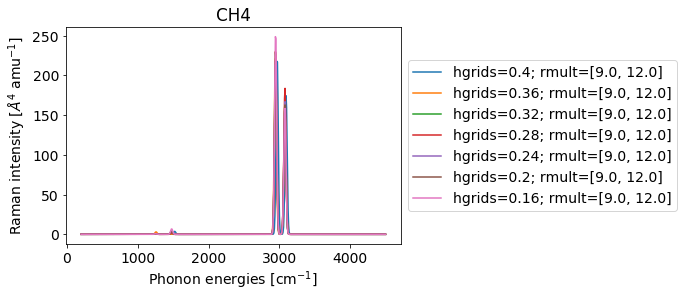

CO
exp: []
th: []
[(2190.25182, 9.71658291)]
[(2154.84754, 16.297925)]
[(2153.57446, 10.4507391)]
[(2164.40128, 28.6650032)]
[(2157.98031, 28.2906184)]
[(2160.42876, 13.3074027)]
[(2159.77394, 25.9877748)]


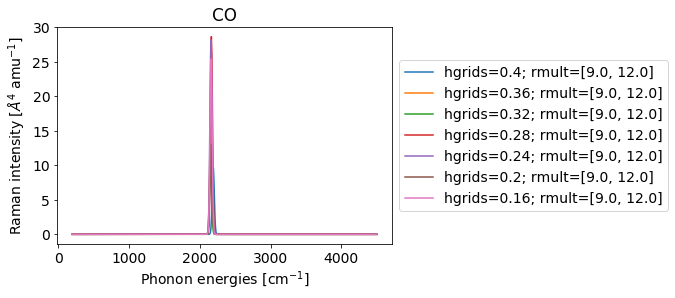

H2O
exp: []
th: [(1575.0, 0.751), (3694.0, 109.0), (3808.0, 25.9), (1534.0, 0.632), (3698.0, 115.0), (3812.0, 24.8)]
[(3750.84041, 93.2496408), (3706.94032, 64.8231349), (1710.40051, 16.6859968)]
[(3705.52053, 76.0583173), (3833.67382, 23.1317473), (1541.37664, 0.391513256)]
[(3733.56424, 76.6869321), (3872.15161, 25.1068394), (1686.42207, 1.12249525)]
[(3721.40088, 100.958963), (3846.90081, 17.8027352), (1633.62935, 9.97969804)]
[(3819.29737, 3.16563886), (3699.16596, 76.1888688), (1527.72857, 0.621824498)]
[(3702.892, 105.712531), (3816.50605, 81.8241626), (1546.29687, 6.43778609)]
[(3703.43582, 99.1861139), (3814.89352, 41.03293), (1554.2555, 10.8899912)]


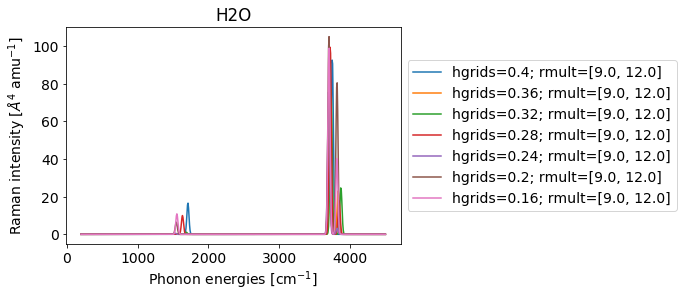

H3CCN
exp: []
th: []
[(3058.74071, 20.0405777), (3039.32503, 60.9455234), (2954.93419, 123.017603), (2310.68748, 12.5787428), (1431.12044, 0.928414746), (1407.79808, 4.52930237), (1340.46813, 78.9343911), (981.44097, 183.795385), (1022.38431, 0.0472795253), (1024.77635, 245.0707), (409.848757, 96.4893092), (409.798981, 209.700057)]
[(3044.07152, 20.5700654), (3036.54907, 2514.239), (2956.50941, 1839.9602), (2307.34955, 203.833194), (1392.04606, 1.0942114), (1388.0979, 142.253915), (1326.44425, 41.4433719), (998.730434, 0.660154727), (999.335031, 43.0486253), (960.567301, 19.6888562), (387.110735, 0.0325376939), (372.45195, 130.983515)]
[(3042.7571, 20.3503279), (3039.45533, 736.515233), (2957.83527, 14117.7124), (2305.94597, 118.87957), (1388.92027, 2.50414017), (1387.73352, 5789.66743), (1331.13171, 5249.05904), (1000.15736, 4.90352593), (999.380822, 883.838336), (947.756331, 2110.50118), (384.842853, 0.0980695555), (378.26773, 128.428164)]
[(3041.87581, 184.13915895), (3041.42378, 26

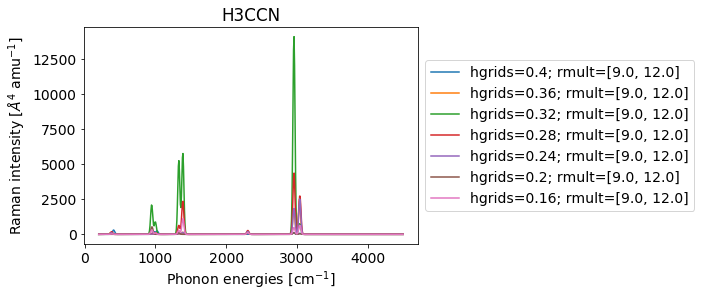

H3CNC
exp: []
th: []
[(2932.82875, 85.0221666), (3024.6929, 1090.88602), (3030.06315, 1126.65571), (2199.81567, 3.87873465), (1400.78775, 115.357132), (1358.26415, 90.1083352), (1374.20365, 34.3411467), (994.097992, 8.42415913), (1073.20359, 62.012909), (1080.06767, 114.296267), (268.703246, 771.059)]
[(2948.95501, 1544.34074), (3028.78639, 3596.30217), (3031.76749, 39.7316861), (2193.83099, 150.608809), (1369.49403, 523.356296), (1403.76974, 145.312529), (1407.90628, 2034.39445), (982.186406, 598.113437), (1079.42609, 367.172838), (1080.6894, 128.811134), (281.367871, 757.04207), (262.967784, 982.220371)]
[(2192.34408, 211.976686), (2950.61109, 664.998671), (3030.91978, 2191.62384), (3031.795, 556.552685), (986.812001, 38.7791788), (1372.973, 76.7482612), (1407.71135, 275.983041), (1406.95683, 1976.20482), (1084.26837, 13.6031057), (1083.82633, 848.416349), (278.830098, 1442.50066), (284.73206, 4.41712196)]
[(2950.87195, 118.267428), (3030.39252, 5562.76188), (3033.20584, 31.9748354),

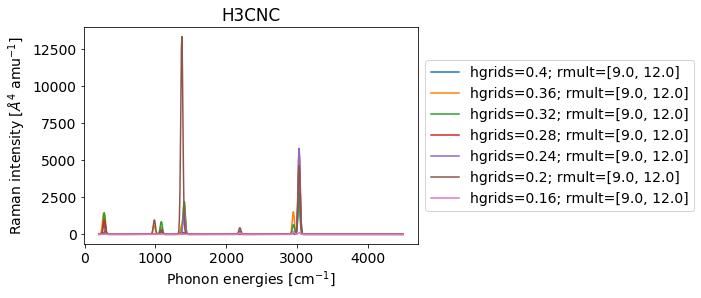

HCCH
exp: [(2011.0, 120.0), (3497.0, 58.0)]
th: [(603.0, 4.97), (734.0, 0.0), (2010.0, 115.0), (3366.0, 0.0), (3464.0, 56.4), (626.0, 4.94), (720.0, 0.0), (2024.0, 120.0), (3323.0, 0.0), (3420.0, 60.7)]
[(3298.02795, 2.84744505), (3411.99866, 52.23934), (2007.00528, 125.082925), (766.359244, 0.028376262), (766.34166, 0.015798016), (646.626766, 2.2322228), (646.605182, 2.24327673)]
[(3308.24592, 2.52883635), (3409.63719, 44.6298884), (2007.63582, 166.288121), (725.454971, 1.16478831), (725.427881, 0.282452131), (634.88372, 2.18582619), (634.853292, 2.38710187)]
[(3320.71739, 76.1483007), (3413.43951, 48.3673168), (2011.69003, 115.889597), (719.116811, 0.140657773), (636.340506, 2.74772128), (636.272252, 2.77753249)]
[(3316.45988, 0.553599365), (3413.34627, 57.3948142), (2010.77028, 121.287137), (717.193091, 0.121771539), (717.101058, 0.236785787), (633.256302, 2.91990898), (633.155098, 2.49084867)]
[(3413.10377, 58.6068355), (3309.70996, 0.113564), (2009.33178, 122.499472), (716.718403,

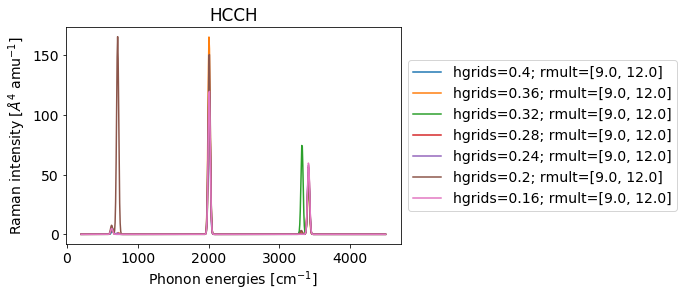

HCN
exp: []
th: []
[(3317.34563, 6.21807421), (2123.492, 186.991266), (734.804471, 2.90468237), (734.789813, 2.26859882)]
[(3363.44262, 4723.14169), (2163.9996, 628.003149), (732.458355, 0.16089432), (732.452994, 0.0387569894)]
[(3331.66136, 3878.02034), (2136.73345, 629.409874), (718.153418, 0.0133667873)]
[(3341.52756, 59.3389728), (2148.73549, 187.996962), (717.172585, 0.0423159113)]
[(3341.2545, 60.17890289), (2144.55961, 187.22188953), (710.788854, 2.26365945), (710.787495, 2.22744273)]
[(3335.92413, 60.8387665), (2139.41098, 186.373313), (713.728134, 2.44122398), (713.729014, 1.82259995)]
[(3335.07771, 61.3577459), (2139.13423, 185.286487), (713.431667, 32.2513742)]


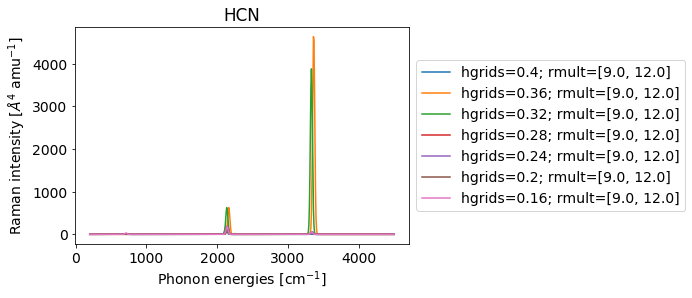

N2
exp: []
th: []
[(2392.96977, 23.8137557)]
[(2381.02013, 24.1163686)]
[(2379.80244, 24.2412656)]
[(2382.79295, 24.1105635)]
[(2384.09454, 24.0948954)]
[(2385.64259, 24.1271592)]
[(2387.34487, 23.7859825)]


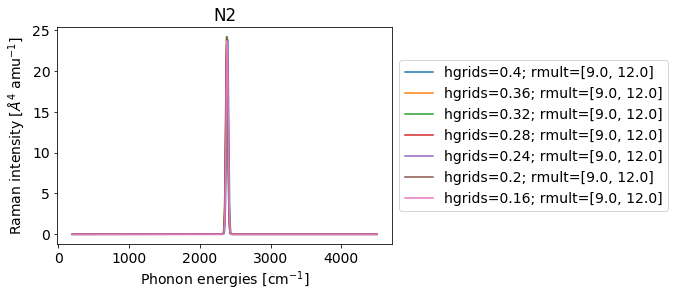

NF3
exp: []
th: []
[(2124.26425, 6.45616152), (1884.23658, 4.96989485), (2009.12855, 1.66888014), (1568.18419, 9.38471312), (1497.66092, 3.4962807), (869.371366, 0.680055304)]
[(1391.50962, 5.80367739), (1123.08003, 4.80413223), (1241.87374, 2.09315329), (897.49801, 5.8077844), (564.818018, 0.63247723), (625.961785, 4.95123595)]
[(1039.65516, 10.2998954), (881.980066, 3.38075851), (872.127597, 3.36834689), (669.297221, 5.99751736), (466.738036, 1.52264584), (514.387443, 1.77094308)]
[(1035.52943, 8.97295985), (859.336398, 3.57834043), (843.35465, 3.16019854), (505.723531, 2.18658014), (630.110467, 3.67040456), (470.382784, 1.70089933)]
[(1021.11897, 11.3685429), (863.95491, 3.02432087), (848.471682, 3.18196001), (640.690455, 6.08575361), (495.223604, 1.77878637), (478.429002, 2.01236526)]
[(1028.47231, 10.47359309), (866.40777, 2.56378848), (856.378084, 3.63809346), (641.982746, 4.66748422), (483.475862, 2.21694167), (472.2115, 3.24258217)]
[(1037.01459, 11.30501014), (867.872964, 4.05

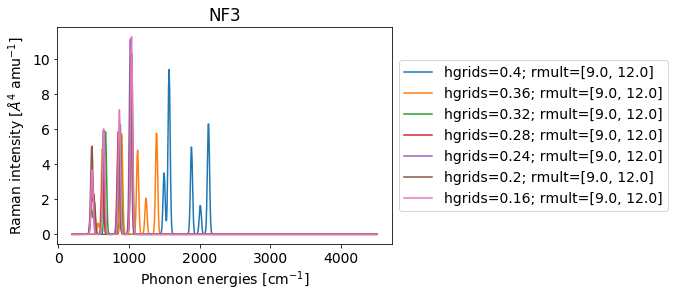

NH3
exp: []
th: []
[(3526.59686, 27.36428197), (3521.74071, 68.60825288), (3381.07344, 305.51982227), (1589.95088, 1.17944367), (1573.24469, 7.96889201), (802.773255, 217.63482826)]
[(3527.90151, 48.2641815), (3510.84698, 89.716786), (3386.07897, 175.522692), (1578.79091, 0.927885891), (1560.96773, 26.4029709), (1007.02485, 157.392033)]
[(3528.21901, 27.54134617), (3524.75703, 26.60628161), (3386.64286, 160.95553131), (1576.40209, 1.20191949), (1573.95906, 52.29968163), (852.692291, 79.51570675)]
[(3528.20437, 53.0283677), (3523.53322, 67.4762201), (3389.90678, 308.498705), (1576.7668, 8.12863515), (1574.80684, 0.490733714), (983.363637, 69.1551784)]
[(3388.23571, 207.92815555), (3525.20785, 39.93522485), (3522.1774, 28.22056569), (1575.99911, 0.91922449), (1573.6774, 165.3288758), (945.28206, 86.64881039)]
[(3523.85391, 95.4303578), (3521.84499, 56.6250768), (3388.62219, 264.875029), (1575.30907, 2.83691892)]
[(3524.49161, 25.1262199), (3523.44386, 21.5896137), (3388.05437, 150.183976

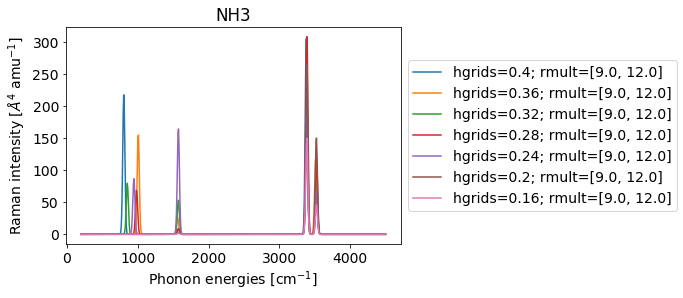

SiF4
exp: []
th: []
[(1808.93776, 11.3751887), (1822.86157, 1.15718636), (1824.58204, 1.11615829), (1824.57358, 1.11536723), (1669.38445, 0.298853078), (1669.36939, 0.289761548), (1588.61846, 0.0790917518), (1589.33584, 0.074734426), (1589.33953, 0.0702873679)]
[(1119.53205, 10.9798196), (1237.78431, 0.815744111), (1238.22096, 0.794697799), (1238.21344, 0.795520312), (894.440497, 0.358209948), (895.919493, 0.358904852), (895.938745, 0.356019872), (884.594638, 0.275392677), (884.593427, 0.295057471)]
[(819.507273, 10.9255013), (1040.12992, 0.928126898), (1040.42485, 0.704062914), (1040.41111, 0.679401505), (469.030659, 0.302770645), (468.517522, 0.530403692), (468.568272, 0.416243977), (386.571496, 0.320026518), (386.565146, 0.314574539)]
[(850.023711, 10.7577831), (1059.33881, 0.708562309), (1059.57702, 0.590378722), (1059.5668, 0.656779708), (544.294787, 0.37094715), (544.611595, 0.425944809), (544.645238, 0.426665349), (484.539426, 0.304963793), (484.599756, 0.305611827)]
[(814.32264

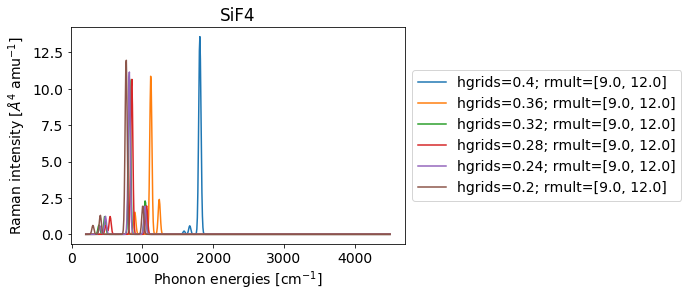

In [7]:
from sqlite3 import OperationalError

grid = np.linspace(200, 4500, 601)

for name in MOLECULES:
    print(name)
    # Gather experimental and theoretical values
    exp = c.execute("SELECT e.value, r.value, r.notes "
                    "FROM exp_raman_intensity r "
                    "JOIN exp_phonon_energy e "
                    "ON r.id_mode = e.id_mode "
                    "WHERE r.molecule = ?", [name]).fetchall()
    exp_values = [data[:-1] for data in exp]
    print("exp:", exp_values)
    th = c.execute("SELECT e.value, r.value, r.notes "
                   "FROM th_raman_intensity r "
                   "JOIN th_phonon_energy e "
                   "ON r.id_mode = e.id_mode "
                   "WHERE r.molecule = ?", [name]).fetchall()
    th_values = [data[:-1] for data in th]
    print("th:", th_values)
    # Gather all the phonons energies and their related Raman intensity
    # in a temporary table
    try:
        c.execute("CREATE TEMP TABLE raman_spectrum AS "
                  "SELECT n.id, n.molecule, n.hgrid, n.frmult, n.crmult, "
                  "       e.value AS energy, r.value AS intensity "
                  "FROM raman_intensity r "
                  "JOIN phonon_energy e "
                  "ON r.id_notebook = e.id_notebook AND r.id_mode = e.id_mode "
                  "JOIN notebook n "
                  "ON e.id_notebook = n.id "
                  "WHERE e.value > 200 AND r.value > 0.0001")
        results = c.fetchall()
    except OperationalError as e:
        pass
    # Get the id of the notebooks for the given molecule
    ids_nb = [
        val
        for (val,) in c.execute(
            "SELECT id FROM raman_spectrum "
            "WHERE molecule = ? AND frmult = 9 AND crmult = 12 "
            "GROUP BY id", [name]
        ).fetchall()
    ]
    # Loop over
    for id_nb in ids_nb:
        modes = c.execute("SELECT energy, intensity FROM raman_spectrum "
                          "WHERE id = ?", [id_nb]).fetchall()
        hg, frm, crm = c.execute("SELECT hgrid, frmult, crmult "
                                 "FROM raman_spectrum "
                                 "WHERE id = ? "
                                 "GROUP BY hgrid", [id_nb]).fetchall()[0]
        if modes:
            print(modes)
            spectrum = np.zeros_like(grid)
            for ω, intensity in modes:
                spectrum += gaussian(ω, intensity, grid)
            plt.plot(grid, spectrum, label=f"hgrids={hg}; rmult=[{frm}, {crm}]")
    plt.title(name)
    plt.xlabel(r"Phonon energies [cm$^{-1}$]")
    plt.ylabel(r"Raman intensity [$\AA^4$ amu$^{-1}$]")
    plt.legend(loc=6, bbox_to_anchor=(1, 0.5))
    plt.show()